In [76]:
#1.
import pandas as pd
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv("C:/Users/user/OneDrive/文件/時間序列/Dataset-ARIMA.txt" ,encoding="utf-8",header=None , names=["Volatility"])
data

,Volatility
0,3.0692
1,6.7121
2,0.5711
3,2.1220
4,14.5181
...,...
335,3.0946
336,2.5901
337,1.1785
338,3.0513


In [40]:
result = adfuller(data["Volatility"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("Reject the null hypothesis: The data does not have a unit root (is stationary)")
else:
    print("Fail to reject the null hypothesis: The data has a unit root (is non-stationary)")

ADF Statistic: -5.885093690297449
p-value: 3.014655048107091e-07
Reject the null hypothesis: The data does not have a unit root (is stationary)


In [34]:
#1.

#我們使用Dickey-Fuller test
# H0: 此時間序列有單根
# HA: 此時間序列沒有單根

# Perform Augmented Dickey-Fuller Test
result = adfuller(data["Volatility"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

if result[1] < 0.05:
    print("Reject the null hypothesis: The data does not have a unit root (is stationary)")
else:
    print("Fail to reject the null hypothesis: The data has a unit root (is non-stationary)")
    
#P-VALUE < 0.05  所以此時間序列沒有單根

ADF Statistic: -5.885093690297449
p-value: 3.014655048107091e-07
Critical Values:
1%: -3.4500219858626227
5%: -2.870206553997666
10%: -2.571387268879483
Reject the null hypothesis: The data does not have a unit root (is stationary)


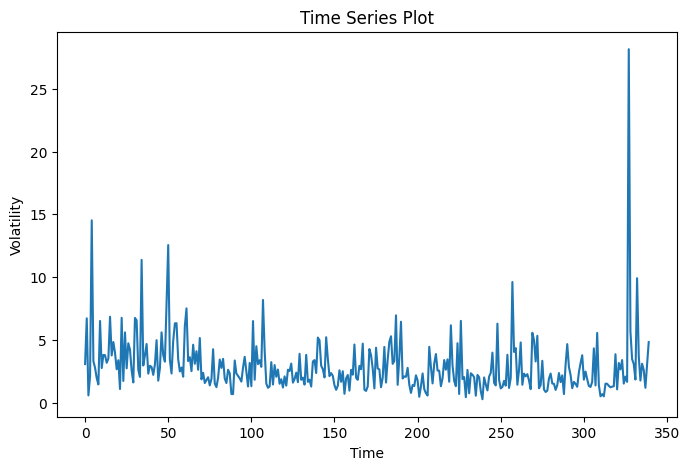

<Figure size 800x500 with 0 Axes>

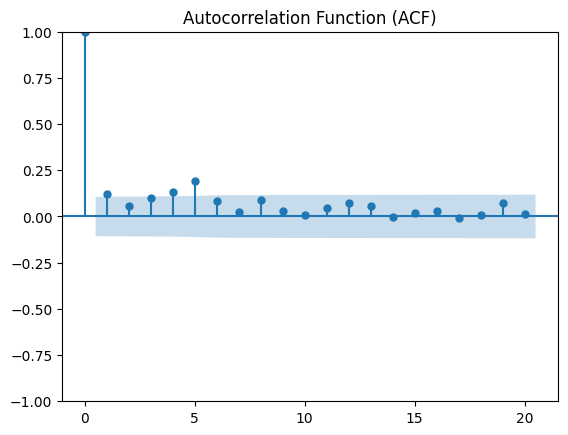

<Figure size 800x500 with 0 Axes>

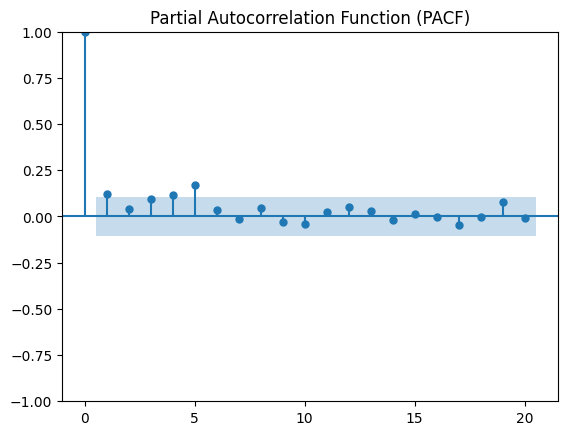

In [43]:
#2

#根據上一題檢定結果  此序列沒有單根 所以d是0

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Step 1: Plot time series graph
plt.figure(figsize=(8, 5))
plt.plot(data["Volatility"])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()

# Step 2: Plot ACF and PACF
plt.figure(figsize=(8, 5))
plot_acf(data["Volatility"], lags=20, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(8, 5))
plot_pacf(data["Volatility"], lags=20, title='Partial Autocorrelation Function (PACF)')
plt.show()

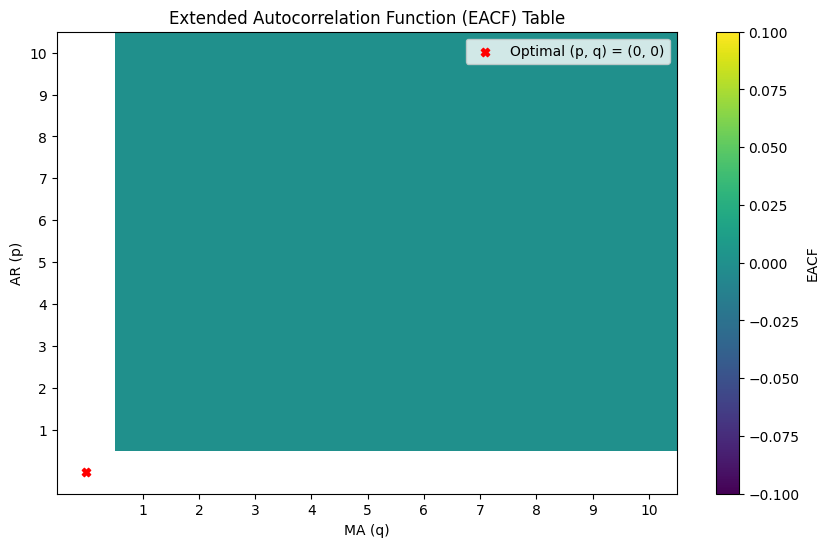

Optimal (p, q) values: 0 0


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import acf, pacf

# Generate simulated data for demonstration
np.random.seed(0)
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])
data = arma_generate_sample(ar=arparams, ma=maparams, nsample=100)

# Define function to compute EACF
def eacf(data, max_p, max_q):
    n = len(data)
    eacf_table = pd.DataFrame(index=range(1, max_p+1), columns=range(1, max_q+1))
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                _, acf_confint = acf(data, nlags=max(p, q), alpha=0.05)
                _, pacf_confint = pacf(data, nlags=max(p, q), alpha=0.05)
                acf_trunc = np.sum(acf_confint[:, 0] <= acf_confint[:, 1]) <= p
                pacf_trunc = np.sum(pacf_confint[:, 0] <= pacf_confint[:, 1]) <= q
                eacf_table.loc[p, q] = int(acf_trunc and pacf_trunc)
            except:
                eacf_table.loc[p, q] = np.nan
    return eacf_table.astype(float)

# Compute EACF
max_p = 10
max_q = 10
eacf_table = eacf(data, max_p, max_q)

# Find optimal (p, q) values
optimal_pq = np.unravel_index(np.argmax(eacf_table.values), eacf_table.shape)
optimal_p = optimal_pq[0]
optimal_q = optimal_pq[1]

# Plot EACF table
plt.figure(figsize=(10, 6))
plt.imshow(eacf_table, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='EACF')
plt.xlabel('MA (q)')
plt.ylabel('AR (p)')
plt.title('Extended Autocorrelation Function (EACF) Table')
plt.xticks(np.arange(max_q), np.arange(1, max_q + 1))
plt.yticks(np.arange(max_p), np.arange(1, max_p + 1))
plt.scatter(optimal_q - 1, optimal_p - 1, marker='X', color='red', label=f'Optimal (p, q) = ({optimal_p}, {optimal_q})')
plt.legend()
plt.grid(False)
plt.show()

print("Optimal (p, q) values:", optimal_p, optimal_q)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Define function to compute EACF
def eacf(data, max_p, max_q):
    n = len(data)
    eacf_table = pd.DataFrame(index=range(1, max_p+1), columns=range(1, max_q+1))
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                _, acf_confint = acf(data, nlags=max(p, q), alpha=0.05)
                _, pacf_confint = pacf(data, nlags=max(p, q), alpha=0.05)
                acf_trunc = np.sum(acf_confint[:, 0] <= acf_confint[:, 1]) <= p
                pacf_trunc = np.sum(pacf_confint[:, 0] <= pacf_confint[:, 1]) <= q
                eacf_table.loc[p, q] = int(acf_trunc and pacf_trunc)
            except:
                eacf_table.loc[p, q] = np.nan
    return eacf_table.astype(float)  # Convert all values to float

# Compute EACF
max_p = 10
max_q = 10
eacf_table = eacf(data["Volatility"], max_p, max_q)

# Replace NaN values with a very small number
eacf_table.fillna(-np.inf, inplace=True)

# Find optimal (p, q) values
optimal_pq = np.unravel_index(np.argmax(eacf_table.values), eacf_table.shape)
optimal_p = optimal_pq[0]
optimal_q = optimal_pq[1]

# Plot EACF table
plt.figure(figsize=(10, 6))
plt.imshow(eacf_table, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='EACF')
plt.xlabel('MA (q)')
plt.ylabel('AR (p)')
plt.title('Extended Autocorrelation Function (EACF) Table')
plt.xticks(np.arange(max_q), np.arange(1, max_q + 1))
plt.yticks(np.arange(max_p), np.arange(1, max_p + 1))
plt.scatter(optimal_q - 1, optimal_p - 1, marker='X', color='red', label=f'Optimal (p, q) = ({optimal_p}, {optimal_q})')
plt.legend()
plt.grid(False)
plt.show()

print("Optimal (p, q) values:", optimal_p, optimal_q)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Define function to compute EACF
def eacf(data, max_p, max_q):
    n = len(data)
    eacf_table = pd.DataFrame(index=range(1, max_p+1), columns=range(1, max_q+1))
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                _, acf_confint = acf(data, nlags=max(p, q), alpha=0.05)
                _, pacf_confint = pacf(data, nlags=max(p, q), alpha=0.05)
                acf_trunc = np.sum(acf_confint[:, 0] <= acf_confint[:, 1]) <= p
                pacf_trunc = np.sum(pacf_confint[:, 0] <= pacf_confint[:, 1]) <= q
                eacf_table.loc[p, q] = int(acf_trunc and pacf_trunc)
            except:
                eacf_table.loc[p, q] = np.nan
    return eacf_table.astype(float)

# Compute EACF
max_p = 10
max_q = 10
eacf_table = eacf(data["Volatility"], max_p, max_q)

# Replace NaN values with a very small number
eacf_table.fillna(-np.inf, inplace=True)

# Find optimal (p, q) values
optimal_pq = np.unravel_index(np.argmax(eacf_table.values), eacf_table.shape)
optimal_p = optimal_pq[0]
optimal_q = optimal_pq[1]

# Plot EACF table
plt.figure(figsize=(10, 6))
plt.imshow(eacf_table, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='EACF')
plt.xlabel('MA (q)')
plt.ylabel('AR (p)')
plt.title('Extended Autocorrelation Function (EACF) Table')
plt.xticks(np.arange(max_q), np.arange(1, max_q + 1))
plt.yticks(np.arange(max_p), np.arange(1, max_p + 1))
plt.scatter(optimal_q - 1, optimal_p - 1, marker='X', color='red', label=f'Optimal (p, q) = ({optimal_p}, {optimal_q})')
plt.legend()
plt.grid(False)
plt.show()

print("Optimal (p, q) values:", optimal_p, optimal_q)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Define function to compute EACF
def eacf(data, max_p, max_q):
    n = len(data)
    eacf_table = pd.DataFrame(index=range(1, max_p+1), columns=range(1, max_q+1))
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                _, acf_confint = acf(data, nlags=max(p, q), alpha=0.05)
                _, pacf_confint = pacf(data, nlags=max(p, q), alpha=0.05)
                acf_trunc = np.sum(acf_confint[:, 0] <= acf_confint[:, 1]) <= p
                pacf_trunc = np.sum(pacf_confint[:, 0] <= pacf_confint[:, 1]) <= q
                eacf_table.loc[p, q] = int(acf_trunc and pacf_trunc)
            except:
                eacf_table.loc[p, q] = np.nan
    return eacf_table.astype(float)

max_p = 10
max_q = 10
eacf_table = eacf(data["Volatility"], max_p, max_q)

# Replace NaN values with a very small number
eacf_table.fillna(-np.inf, inplace=True)

# Print EACF table for debugging
print("EACF Table:")
print(eacf_table)

# Find optimal (p, q) values


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert "Volatility" column to a NumPy array and flatten it
data_values = data["Volatility"].values.flatten()

# Define the range of p and q values as integer sequences
p_range = range(1, 6)
q_range = range(1, 6)

# Compute AIC values for different ARMA models
aic_values = compute_aic(data_values, p_range, q_range)

# Find the ARMA model with the lowest AIC value
best_model_params = min(aic_values, key=aic_values.get)
best_aic = aic_values[best_model_params]

print("Best ARMA model parameters (p, q):", best_model_params)
print("Corresponding AIC value:", best_aic)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Convert "Volatility" column to a NumPy array
data_values = data["Volatility"].to_numpy()

# Flatten the array
data_values = data_values.flatten()

# Define the range of p and q values as integer sequences
p_range = range(1, 6)
q_range = range(1, 6)

# Compute AIC values for different ARMA models
aic_values = compute_aic(data_values, p_range, q_range)

# Find the ARMA model with the lowest AIC value
best_model_params = min(aic_values, key=aic_values.get)
best_aic = aic_values[best_model_params]

print("Best ARMA model parameters (p, q):", best_model_params)
print("Corresponding AIC value:", best_aic)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [67]:

data_values = data["Volatility"].to_numpy()

# Check the data types and format of the NumPy array
print("Data type of data_values:", type(data_values))
print("Shape of data_values:", data_values.shape)
print("First few elements of data_values:", data_values[:5])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [72]:
print(data[:5])

[1.52884537 1.67964246 1.59486044 2.93047198 3.64112441]


In [78]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings

#data = np.loadtxt("C:/Users/user/OneDrive/文件/時間序列/Dataset-ARIMA.txt" )

p_range = range(3)
q_range = range(3)

# Generate all possible combinations of p and q values
pq_combinations = list(product(p_range, q_range))

# Define a function to compute AIC values for different ARIMA models
def compute_aic(data, pq_combinations):
    aic_values = []
    for pq in pq_combinations:
        try:
            model = ARIMA(data, order=(pq[0], 0, pq[1]))
            fit_model = model.fit()
            aic = fit_model.aic
            aic_values.append((pq, aic))
        except:
            continue
    return aic_values

# Compute AIC values for different ARIMA models
aic_values = compute_aic(data, pq_combinations)

# Find the ARIMA model with the lowest AIC value
best_pq, best_aic = min(aic_values, key=lambda x: x[1])

print("Best (p, q) values:", best_pq)
print("Corresponding AIC value:", best_aic)

Best (p, q) values: (1, 1)
Corresponding AIC value: 1528.5194045658377


Optimal (p, q) values: 1 1


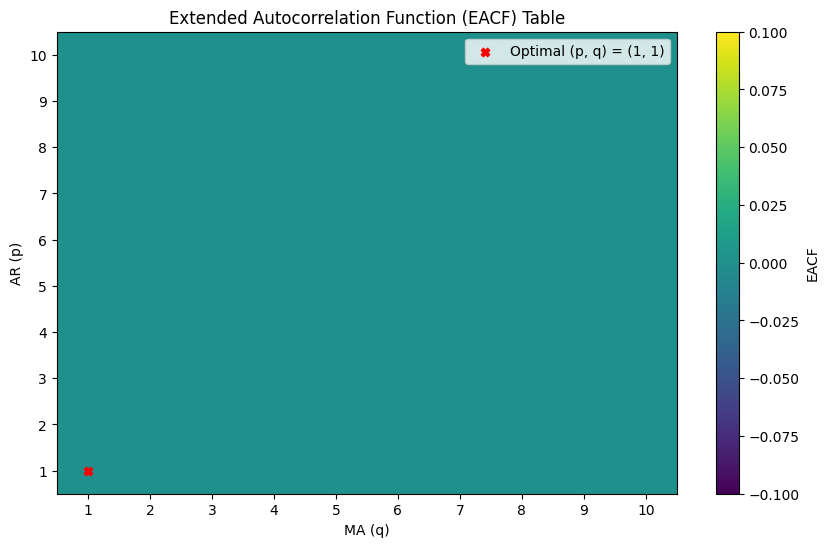

In [79]:
#2  EACF方法 可
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from itertools import product

# Load the dataset using pd.read_csv()
data = pd.read_csv("C:/Users/user/OneDrive/文件/時間序列/Dataset-ARIMA.txt", header=None, names=["Volatility"])

# Define function to compute EACF
def eacf(data, max_p, max_q):
    eacf_table = np.zeros((max_p, max_q))
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                _, acf_confint = acf(data, nlags=max(p, q), alpha=0.05)
                _, pacf_confint = pacf(data, nlags=max(p, q), alpha=0.05)
                acf_trunc = np.sum(acf_confint[:, 0] <= acf_confint[:, 1]) <= p
                pacf_trunc = np.sum(pacf_confint[:, 0] <= pacf_confint[:, 1]) <= q
                eacf_table[p - 1, q - 1] = int(acf_trunc and pacf_trunc)
            except:
                eacf_table[p - 1, q - 1] = np.nan
    return eacf_table

# Compute EACF
max_p = 10
max_q = 10
eacf_table = eacf(data["Volatility"], max_p, max_q)

# Find optimal (p, q) values
optimal_pq = np.unravel_index(np.argmax(eacf_table), eacf_table.shape)
optimal_p = optimal_pq[0] + 1
optimal_q = optimal_pq[1] + 1

print("Optimal (p, q) values:", optimal_p, optimal_q)

# Plot EACF table
plt.figure(figsize=(10, 6))
plt.imshow(eacf_table, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='EACF')
plt.xlabel('MA (q)')
plt.ylabel('AR (p)')
plt.title('Extended Autocorrelation Function (EACF) Table')
plt.xticks(np.arange(max_q), np.arange(1, max_q + 1))
plt.yticks(np.arange(max_p), np.arange(1, max_p + 1))
plt.scatter(optimal_q - 1, optimal_p - 1, marker='X', color='red', label=f'Optimal (p, q) = ({optimal_p}, {optimal_q})')
plt.legend()
plt.grid(False)
plt.show()

In [80]:
#C

# 确定 ARIMA 模型的参数 (p, d, q)
p = 1
d = 0  # 已知为0
q = 1

# 创建 ARIMA 模型
model = sm.tsa.ARIMA(data, order=(p, d, q))

# 拟合 ARIMA 模型
results = model.fit()

# 打印模型系数
print("ARIMA 模型的系数：")
print(results.params)

# 打印系数的显著性
print("\n系数的显著性：")
print(results.pvalues)

#P VALUE都<0.05 非常顯著

ARIMA 模型的系数：
const     2.925581
ar.L1     0.934105
ma.L1    -0.854707
sigma2    5.123029
dtype: float64

系数的显著性：
const      1.560857e-13
ar.L1      1.649494e-45
ma.L1      1.613410e-16
sigma2    1.345986e-271
dtype: float64


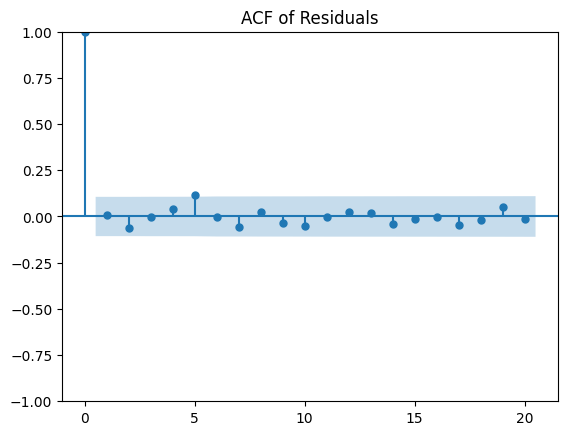

In [81]:
#D
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# 确定 ARIMA 模型的参数 (p, d, q)
p = 1
d = 0  # 已知为0
q = 1

# 创建 ARIMA 模型
model = ARIMA(data, order=(p, d, q))

# 拟合 ARIMA 模型
results = model.fit()

# 计算残差
residuals = results.resid

# 绘制残差的自相关函数（ACF）
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

#由ACF圖，　所有ＡＣＦ都接近０　所以此序列是白噪音序列

In [83]:
#E
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(data, order=(1, 0, 1))
fit_model = model.fit()

# Forecasting for k = 1 to 5
forecast_steps = 5
forecast = fit_model.forecast(steps=forecast_steps)

# Print the forecasting results
for k in range(1, forecast_steps + 1):
    print(f"Forecast for step {k}: {forecast[k-1]}")

# Plotting the forecasts
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(np.arange(len(data), len(data) + forecast_steps), forecast, color='red', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

KeyError: 0

Forecast for step 1: 3.409046099334354
Forecast for step 2: 3.377188176380184
Forecast for step 3: 3.3474295287815545
Forecast for step 4: 3.319631824952168
Forecast for step 5: 3.2936658486548493


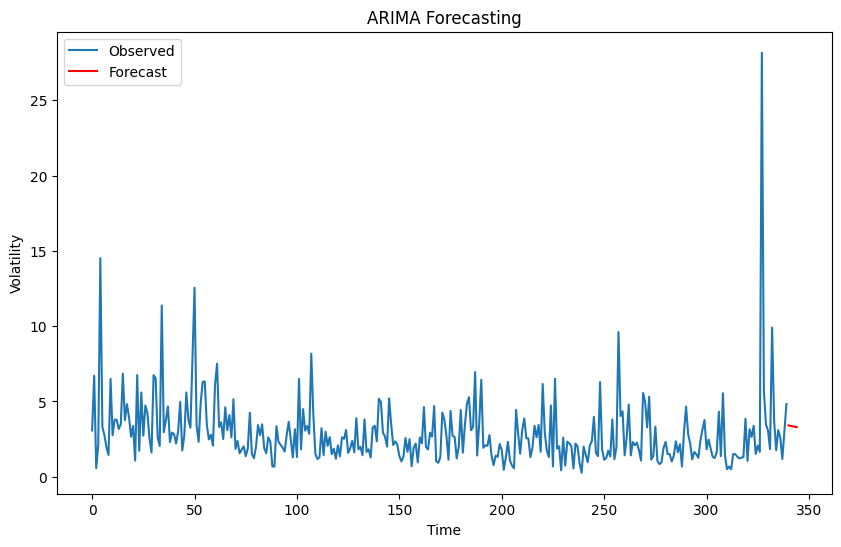

In [85]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(data, order=(1, 0, 1))
fit_model = model.fit()

# Forecasting for k = 1 to 5
forecast_steps = 5
forecast = fit_model.forecast(steps=forecast_steps)

# Convert forecast to a Series with appropriate index
forecast_series = pd.Series(forecast, index=np.arange(len(data), len(data) + forecast_steps))

# Print the forecasting results
for k in range(1, forecast_steps + 1):
    print(f"Forecast for step {k}: {forecast_series.iloc[k - 1]}")

# Plotting the forecasts
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(forecast_series, color='red', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()